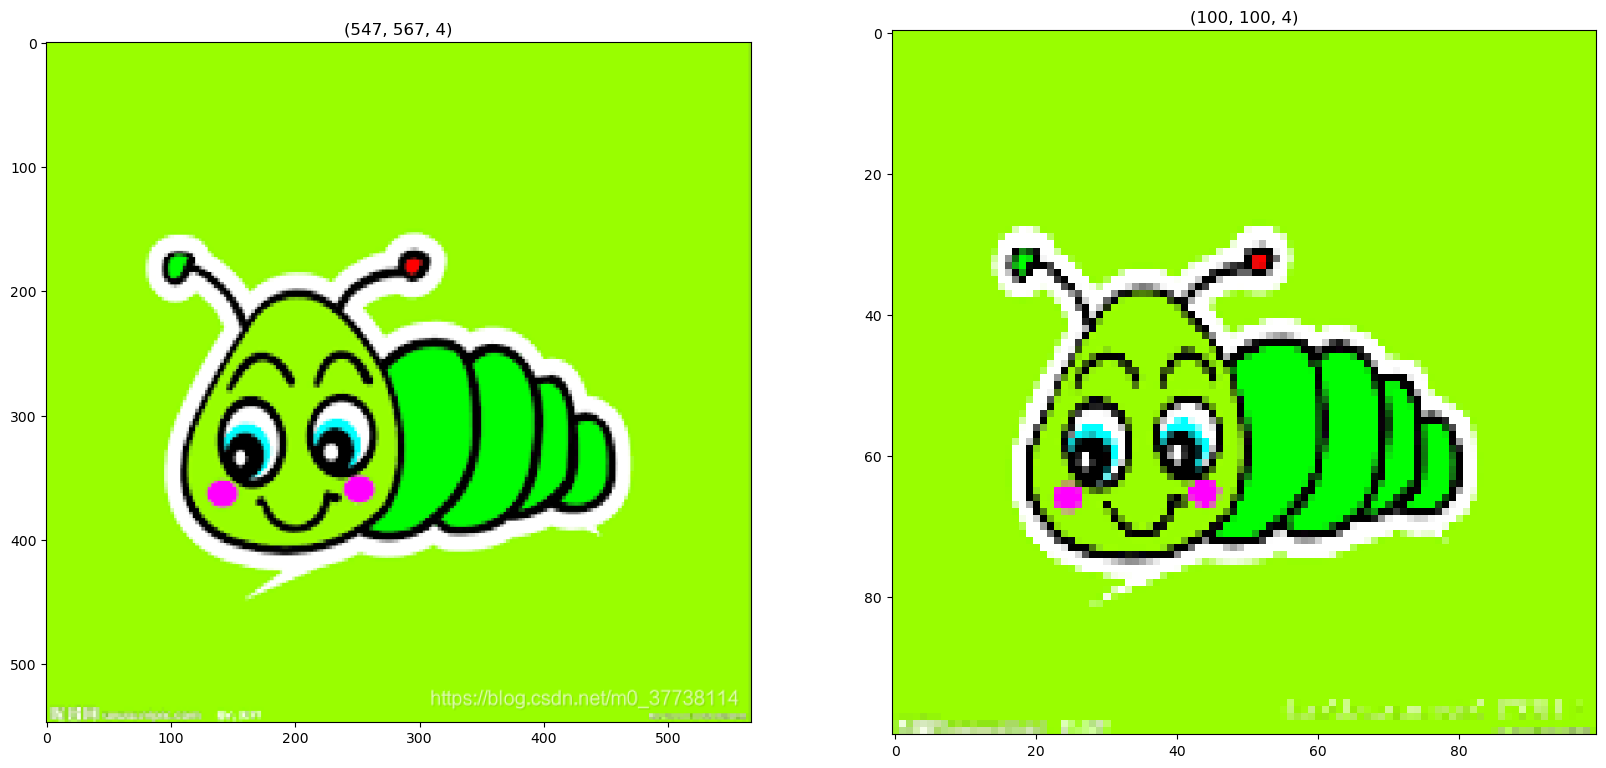

In [40]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import seaborn as sns
from openpyxl import Workbook


image = Image.open("imgs/bug.jpg")
image_array = np.array(image)

resized_image = cv2.resize(image_array, (int(100), int(100)))    #调整图像尺寸

_,(ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.imshow(image,cmap = "gray")
ax1.set_title(image_array.shape)

ax2.imshow(resized_image,cmap = "gray")
ax2.set_title(resized_image.shape)


# 获取当前工作目录
current_directory = os.getcwd()

# 创建一个新的工作簿
workbook = Workbook()
sheet = workbook.active

# 将像素值写入 Excel 表格
# for y, row in enumerate(resized_image):
#     for x, pixel_value in enumerate(row):
#         sheet.cell(row=y + 1, column=x + 1, value=pixel_value)

image_array_color= np.array(resized_image)
height, width, channels = image_array_color.shape
# print(image_array_color)

# 将像素值写入 Excel 表格
for y in range(height):
    for x in range(width):        
        red, green, blue,white = image_array_color[y,x]        
        sheet.cell(row=y+ 1, column=x + 1, value=red)
        # sheet.cell(row=y * 3 + 1, column=x + 1, value=red)
        # sheet.cell(row=y * 3 + 2, column=x + 1, value=green)
        # sheet.cell(row=y * 3 + 3, column=x + 1, value=blue)

# 保存工作簿
output_path = os.path.join(current_directory, "output.xlsx")
workbook.save(output_path)


(153, 249)


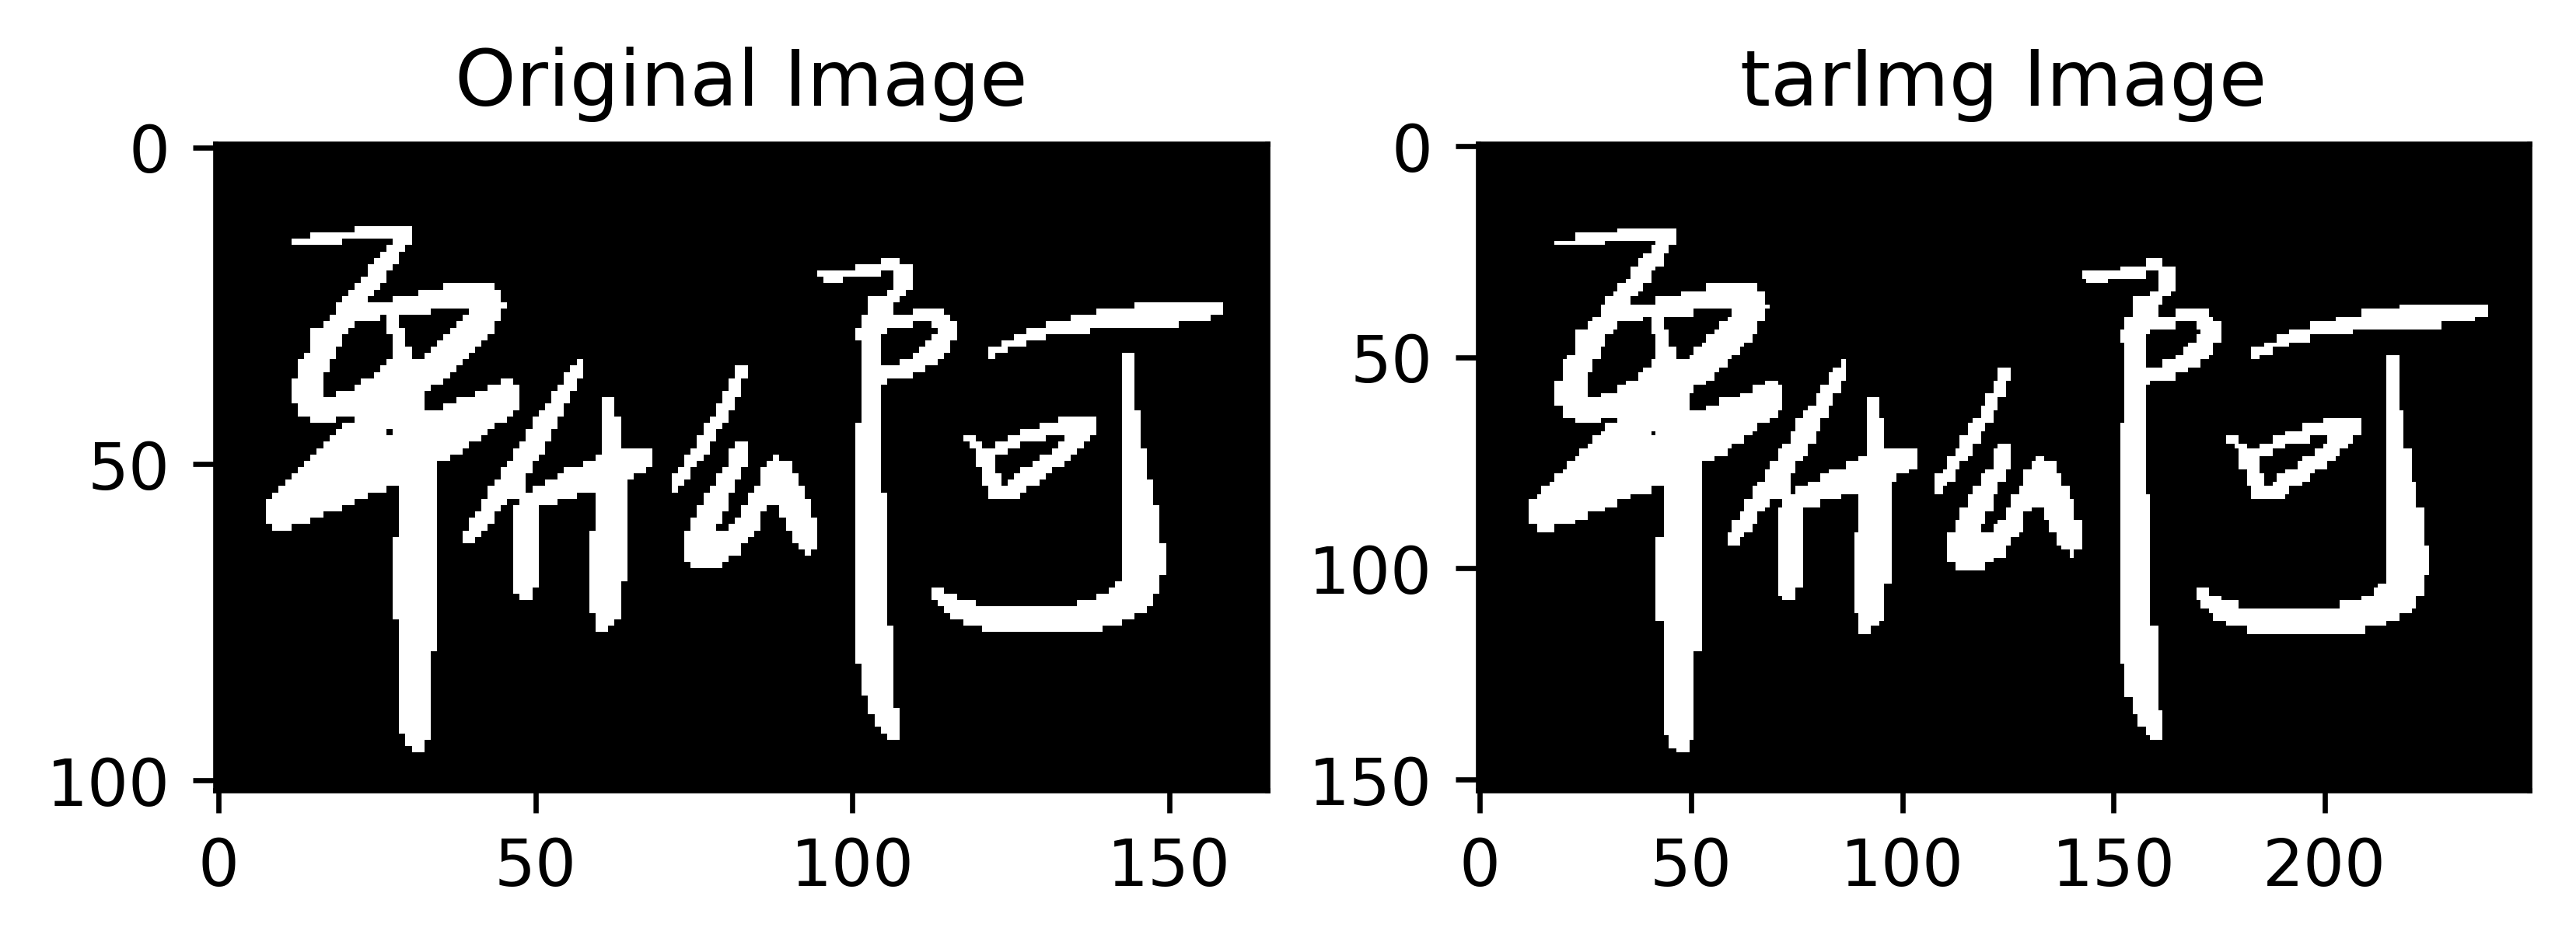

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
 
def NNI(img, img_shape, tar_shape):
    ratioH = tar_shape[0] / img_shape[0]
    ratioW = tar_shape[1] / img_shape[1]
    tarImg = np.zeros((int(tar_shape[0]), int(tar_shape[1])))
    print(tarImg.shape)
    for h in range(int(tar_shape[0])):
        for w in range(int(tar_shape[1])):
            srch = int(h / ratioH)
            srcw = int(w / ratioW)
            # srch = round(h / ratioH)
            # srcw = round(w / ratioW)

            tarImg[h][w] = img[srch][srcw]
    return tarImg
 
 
img = cv2.imread('imgs/pingshenmea.png',cv2.IMREAD_GRAYSCALE)

#预处理，做成2值灰度图
image_array = np.array(img)
image_new = np.floor(image_array / (2**7))
image_new = np.uint8(255 * image_new / np.max(image_new))

# print(img.shape)
img_shape = (img.shape[0], img.shape[1])
tar_shape = (img.shape[0] * 1.5, img.shape[1] * 1.5)
tarImg = NNI(image_new, img_shape, tar_shape)

 # 显示原始图像
plt.figure(dpi=600) #指定输出像素大小

# plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_new, cmap='gray')


plt.subplot(1, 2, 2)
plt.title('tarImg Image')
plt.imshow(tarImg, cmap='gray')

 # 显示变换后图像



